In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
concrete_data =  pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/training_set_label.csv" )

In [ ]:
concrete_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,298.20,0.0,107.00,209.70,11.10,879.6,744.20,28,31.875165
1,397.00,0.0,0.00,186.00,0.00,1040.0,734.00,28,36.935229
2,251.37,0.0,118.27,188.45,6.35,1028.4,757.73,56,36.638755
3,304.00,140.0,0.00,214.00,6.00,895.0,722.00,28,33.418902
4,297.00,0.0,0.00,186.00,0.00,1040.0,734.00,7,30.957472


In [ ]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772 entries, 0 to 771
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              772 non-null    float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  772 non-null    float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             772 non-null    float64
 3   Water  (component 4)(kg in a m^3 mixture)              772 non-null    float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    772 non-null    float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   772 non-null    float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      772 non-null    float64
 7   Age (day)                                              772 non-null    int64  
 8   Concrete compressive strength(MPa, megapascals)    

In [ ]:
concrete_data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,280.722565,76.496140,52.701347,182.361593,6.000848,971.558782,771.618355,44.993523,35.724196
std,104.711803,87.477423,63.596763,20.913641,5.844002,77.078828,79.785875,60.442735,16.797389
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.340000,0.000000,0.000000,166.677500,0.000000,932.000000,724.300000,12.250000,23.677591
50%,275.000000,24.000000,0.000000,185.700000,6.050000,968.000000,777.800000,28.000000,33.870853
75%,350.000000,144.775000,118.187500,193.000000,10.025000,1028.100000,821.000000,56.000000,46.232813
max,540.000000,359.400000,200.100000,237.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


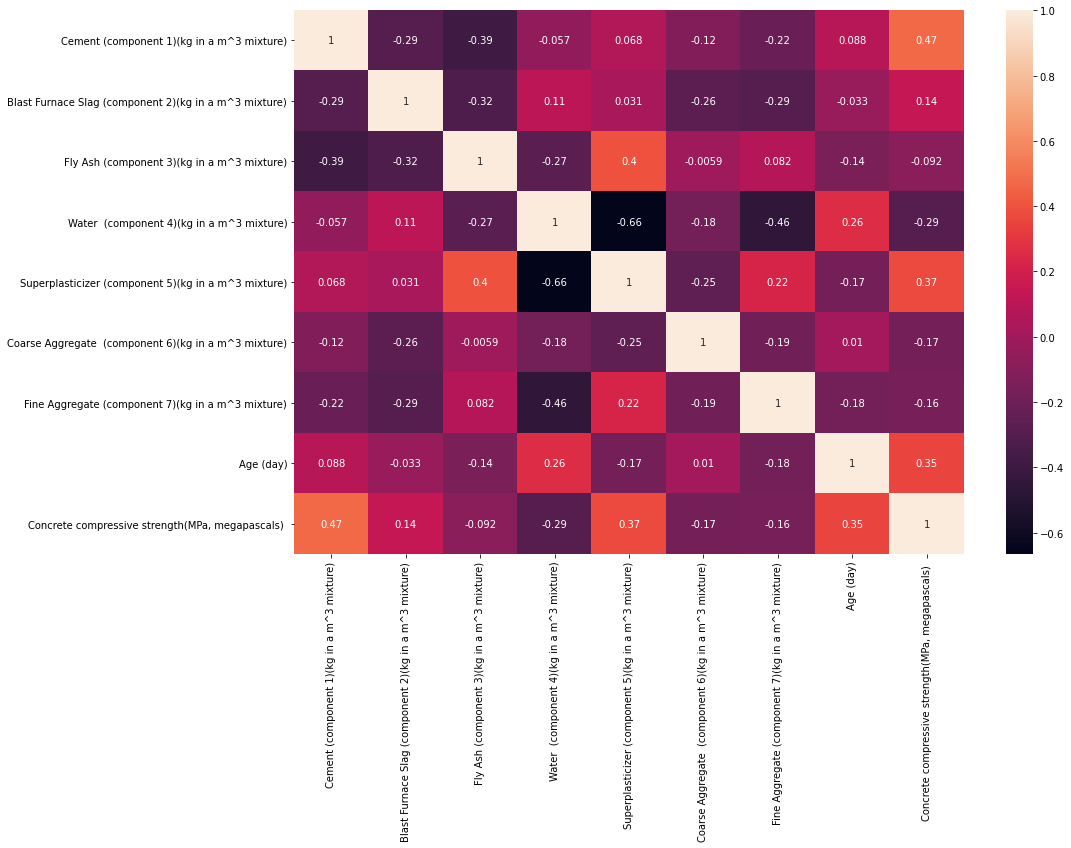

In [ ]:
plt.figure(figsize = (15, 10))
sns.heatmap(concrete_data.corr(), annot = True)
plt.show()

In [ ]:
features = concrete_data.columns.tolist()
target_name = features.pop()

In [ ]:
X = concrete_data[features]
y = concrete_data[target_name]

Cement (component 1)(kg in a m^3 mixture)


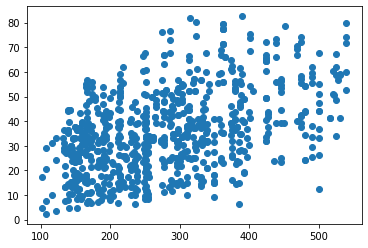

Blast Furnace Slag (component 2)(kg in a m^3 mixture)


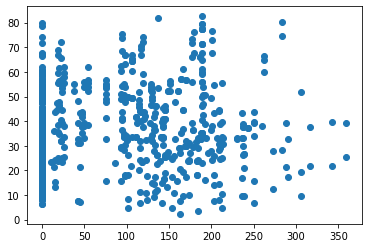

Fly Ash (component 3)(kg in a m^3 mixture)


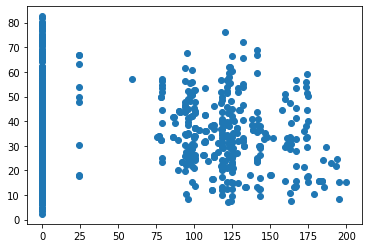

Water  (component 4)(kg in a m^3 mixture)


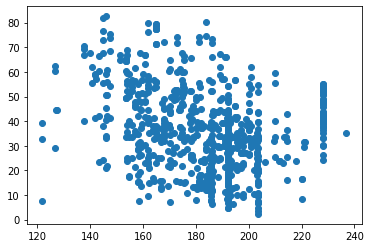

Superplasticizer (component 5)(kg in a m^3 mixture)


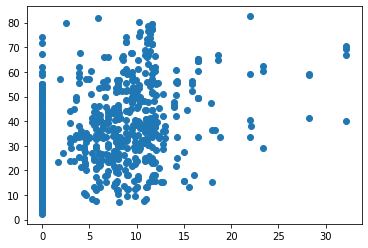

Coarse Aggregate  (component 6)(kg in a m^3 mixture)


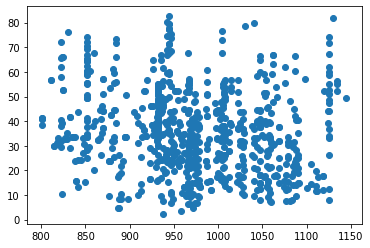

Fine Aggregate (component 7)(kg in a m^3 mixture)


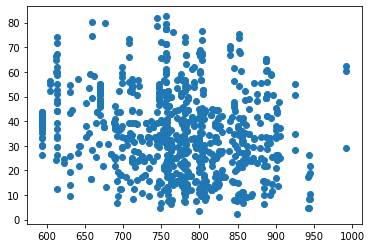

Age (day)


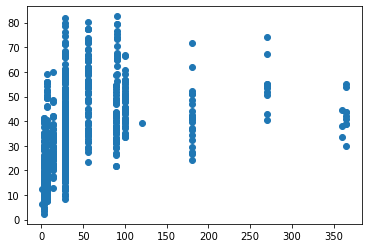

In [ ]:
for feature in features:
  print(feature)
  plt.scatter(X[feature],y)
  plt.show()

Split data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Estandarizando

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_standarized = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_standarized, columns=features)

X_test_standarized = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_standarized, columns=features)

Linear Regrression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import mean_squared_error
lr_predict = lr_model.predict(X_test)
print("====================")
print("MSE TEST: %f"%(mean_squared_error(y_test, lr_predict, squared = False)))
print("====================")


MSE TEST: 10.626448


In [ ]:
print("====================")
print("MSE TRAIN: %f"%(mean_squared_error(y_train, lr_model.predict(X_train), squared = False)))
print("====================")

MSE TRAIN: 10.303389


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_predict = rf_model.predict(X_test)
print("====================")
print("RMSE TEST: %f"%(mean_squared_error(y_test, rf_predict, squared = False)))
print("====================")


RMSE TEST: 5.367715


In [ ]:
print("====================")
print("RMSE TRAIN: %f"%(mean_squared_error(y_train, rf_model.predict(X_train), squared = False)))
print("====================")

RMSE TRAIN: 2.188501


In [ ]:
important_features = pd.Series(data=rf_model.feature_importances_,index=features)
important_features.sort_values(ascending=False,inplace=True)
important_features

Age (day)                                                0.328898
Cement (component 1)(kg in a m^3 mixture)                0.282536
Superplasticizer (component 5)(kg in a m^3 mixture)      0.122452
Water  (component 4)(kg in a m^3 mixture)                0.096953
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.083240
Fine Aggregate (component 7)(kg in a m^3 mixture)        0.041733
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.029008
Fly Ash (component 3)(kg in a m^3 mixture)               0.015181
dtype: float64

Por hacer:
- Ver la importancia de las variables
- hyperparameter tuning
- xgboost
- etc

Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : (100,300,500,700,1000,1500), 
         'max_depth'    : (3,6,10,15,20)
         }
rf_grids = GridSearchCV(RandomForestRegressor(), params, scoring = 'neg_root_mean_squared_error')

In [ ]:
rf_grids.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
rf_grids.cv_results_

{'mean_fit_time': array([0.18089886, 0.51635356, 0.83190627, 1.16028776, 1.65748758,
        2.47323809, 0.21993546, 0.66574607, 1.09102468, 1.53377738,
        2.18577261, 3.31641903, 0.28264732, 0.84124465, 1.42324629,
        2.0012352 , 2.79133067, 4.18798947, 0.30391479, 0.91084161,
        1.50668883, 2.13200741, 3.01425071, 4.54282007, 0.3014616 ,
        0.90449181, 1.51173172, 2.12066455, 3.01674232, 4.52123213]),
 'mean_score_time': array([0.00722561, 0.0190464 , 0.02899361, 0.03947959, 0.05697784,
        0.08400688, 0.00769057, 0.01985703, 0.03171864, 0.04507365,
        0.06331081, 0.09417739, 0.00939536, 0.02369437, 0.03930578,
        0.053795  , 0.07317467, 0.11340885, 0.00935564, 0.02472534,
        0.03981457, 0.05703583, 0.0799253 , 0.11752591, 0.0093349 ,
        0.02503119, 0.04070678, 0.05564899, 0.08053718, 0.11742439]),
 'mean_test_score': array([-9.14416453, -9.1471244 , -9.10871076, -9.12416942, -9.09045656,
        -9.10140255, -6.38527321, -6.36152736, -6.38

In [ ]:
rf_grids.best_score_

-5.357787975421

In [ ]:
rf_grids.best_params_

{'max_depth': 15, 'n_estimators': 500}

XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [ ]:
params = {
    # Parameters that we are going to tune.
    'max_depth':10,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric' : 'rmse'
}
num_boost_round = 999
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)



[0]	Test-rmse:28.4176
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:20.8467
[2]	Test-rmse:15.6319
[3]	Test-rmse:12.0916
[4]	Test-rmse:9.72656
[5]	Test-rmse:7.9905
[6]	Test-rmse:7.09033
[7]	Test-rmse:6.41605
[8]	Test-rmse:5.95118
[9]	Test-rmse:5.65585
[10]	Test-rmse:5.46611
[11]	Test-rmse:5.32743
[12]	Test-rmse:5.24447
[13]	Test-rmse:5.20438
[14]	Test-rmse:5.17581
[15]	Test-rmse:5.14922
[16]	Test-rmse:5.14509
[17]	Test-rmse:5.12163
[18]	Test-rmse:5.11676
[19]	Test-rmse:5.10518
[20]	Test-rmse:5.097
[21]	Test-rmse:5.08658
[22]	Test-rmse:5.08885
[23]	Test-rmse:5.09644
[24]	Test-rmse:5.09914
[25]	Test-rmse:5.09005
[26]	Test-rmse:5.08418
[27]	Test-rmse:5.08279
[28]	Test-rmse:5.07869
[29]	Test-rmse:5.07635
[30]	Test-rmse:5.07051
[31]	Test-rmse:5.06342
[32]	Test-rmse:5.06221
[33]	Test-rmse:5.06019
[34]	Test-rmse:5.05823
[35]	Test-rmse:5.05668
[36]	Test-rmse:5.05655
[37]	Test-rmse:5.05124
[38]	Test-rmse:5.04777
[39]	Test-rmse:5.04884
[40]	Test-rmse:5.04567
[41]	Test-rms

CV xgb

In [ ]:
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'rmse'},
    early_stopping_rounds=10
)

In [ ]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,28.175105,0.292266,28.345010,1.741791
1,20.516861,0.208389,20.931259,1.785394
2,15.113349,0.161468,15.861007,1.554753
3,11.217515,0.106592,12.491012,1.413424
4,8.420119,0.076294,10.261645,1.301787
...,...,...,...,...
73,0.043370,0.026741,5.668074,0.555383
74,0.043054,0.027069,5.668145,0.555341
75,0.042846,0.027235,5.668162,0.555266
76,0.042395,0.027729,5.668092,0.555318


Tuning XGB




In [ ]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,10)
    for min_child_weight in range(5,8)
]

In [ ]:
# Define initial best params and MAE
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=3, min_child_weight=5
	MAE 5.402834 for 226 rounds
CV with max_depth=3, min_child_weight=6
	MAE 5.361391 for 245 rounds
CV with max_depth=3, min_child_weight=7
	MAE 5.334613 for 207 rounds
CV with max_depth=4, min_child_weight=5
	MAE 5.3167002 for 164 rounds
CV with max_depth=4, min_child_weight=6
	MAE 5.2121482 for 201 rounds
CV with max_depth=4, min_child_weight=7
	MAE 5.3156398000000005 for 97 rounds
CV with max_depth=5, min_child_weight=5
	MAE 5.3207184000000005 for 78 rounds
CV with max_depth=5, min_child_weight=6
	MAE 5.1879024000000005 for 108 rounds
CV with max_depth=5, min_child_weight=7
	MAE 5.0525101999999995 for 154 rounds
CV with max_depth=6, min_child_weight=5
	MAE 5.317382 for 138 rounds
CV with max_depth=6, min_child_weight=6
	MAE 5.2938014 for 115 rounds
CV with max_depth=6, min_child_weight=7
	MAE 5.1826908000000005 for 78 rounds
CV with max_depth=7, min_child_weight=5
	MAE 5.4106544 for 129 rounds
CV with max_depth=7, min_child_weight=6
	MAE 5.47159

In [ ]:
params['max_depth'] = 5
params['min_child_weight'] = 7

In [ ]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(3,11)]
    for colsample in [i/10. for i in range(3,11)]
]

In [ ]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
	RMSE 5.0525101999999995 for 154 rounds
CV with subsample=1.0, colsample=0.9
	RMSE 5.3737972 for 132 rounds
CV with subsample=1.0, colsample=0.8
	RMSE 5.418122800000001 for 198 rounds
CV with subsample=1.0, colsample=0.7
	RMSE 5.385783 for 108 rounds
CV with subsample=1.0, colsample=0.6
	RMSE 5.3936188000000005 for 161 rounds
CV with subsample=1.0, colsample=0.5
	RMSE 5.3936188000000005 for 161 rounds
CV with subsample=1.0, colsample=0.4
	RMSE 5.606705600000001 for 305 rounds
CV with subsample=1.0, colsample=0.3
	RMSE 5.6388788 for 410 rounds
CV with subsample=0.9, colsample=1.0
	RMSE 5.570622999999999 for 47 rounds
CV with subsample=0.9, colsample=0.9
	RMSE 5.2743026 for 80 rounds
CV with subsample=0.9, colsample=0.8
	RMSE 4.983958400000001 for 134 rounds
CV with subsample=0.9, colsample=0.7
	RMSE 5.172579799999999 for 123 rounds
CV with subsample=0.9, colsample=0.6
	RMSE 5.2046672 for 134 rounds
CV with subsample=0.9, colsample=0.5
	RMSE 5.2046672

In [ ]:
params['subsample'] = 0.9
params['colsample_bytree'] = 0.8

In [ ]:
min_rmse = float("Inf")
best_params = None
for eta in [.5, .4, .3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    cv_results = xgb.cv(
            params,
            dtrain,
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            metrics=['rmse'],
            early_stopping_rounds=10
          )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds\n".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = eta
print("Best params: {}, RMSE: {}".format(best_params, min_rmse))

CV with eta=0.5
	RMSE 5.5472166000000005 for 103 rounds

CV with eta=0.4
	RMSE 5.3004692 for 55 rounds

CV with eta=0.3
	RMSE 4.983958400000001 for 134 rounds

CV with eta=0.2
	RMSE 5.021507399999999 for 306 rounds

CV with eta=0.1
	RMSE 5.0687532 for 276 rounds

CV with eta=0.05
	RMSE 4.9234054 for 835 rounds

CV with eta=0.01
	RMSE 5.2722384 for 998 rounds

CV with eta=0.005
	RMSE 5.697837 for 998 rounds

Best params: 0.05, RMSE: 4.9234054


In [ ]:
params['eta'] = 0.05

In [ ]:
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")],
    early_stopping_rounds=10
)


[0]	Test-rmse:37.5989
Will train until Test-rmse hasn't improved in 10 rounds.
[1]	Test-rmse:35.8884
[2]	Test-rmse:34.2099
[3]	Test-rmse:32.6394
[4]	Test-rmse:31.1827
[5]	Test-rmse:29.8242
[6]	Test-rmse:28.4378
[7]	Test-rmse:27.1561
[8]	Test-rmse:25.9149
[9]	Test-rmse:24.8654
[10]	Test-rmse:23.8473
[11]	Test-rmse:22.7905
[12]	Test-rmse:21.8527
[13]	Test-rmse:20.9389
[14]	Test-rmse:20.0362
[15]	Test-rmse:19.2863
[16]	Test-rmse:18.553
[17]	Test-rmse:17.7498
[18]	Test-rmse:17.0863
[19]	Test-rmse:16.359
[20]	Test-rmse:15.7861
[21]	Test-rmse:15.1487
[22]	Test-rmse:14.5531
[23]	Test-rmse:13.9871
[24]	Test-rmse:13.4503
[25]	Test-rmse:12.972
[26]	Test-rmse:12.535
[27]	Test-rmse:12.1417
[28]	Test-rmse:11.7302
[29]	Test-rmse:11.372
[30]	Test-rmse:10.9982
[31]	Test-rmse:10.6396
[32]	Test-rmse:10.2808
[33]	Test-rmse:9.9438
[34]	Test-rmse:9.64617
[35]	Test-rmse:9.3611
[36]	Test-rmse:9.10528
[37]	Test-rmse:8.86043
[38]	Test-rmse:8.65818
[39]	Test-rmse:8.44087
[40]	Test-rmse:8.23752
[41]	Test-rmse:8.

In [ ]:
num_boost_round = model.best_iteration + 1
best_model = xgb.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Test")]
)

[0]	Test-rmse:29.5289
[1]	Test-rmse:21.6874
[2]	Test-rmse:16.0593
[3]	Test-rmse:12.6821
[4]	Test-rmse:10.2387
[5]	Test-rmse:8.92668
[6]	Test-rmse:7.8958
[7]	Test-rmse:7.34264
[8]	Test-rmse:6.93591
[9]	Test-rmse:6.76546
[10]	Test-rmse:6.58583
[11]	Test-rmse:6.37038
[12]	Test-rmse:6.1819
[13]	Test-rmse:6.10385
[14]	Test-rmse:5.97696
[15]	Test-rmse:5.94099
[16]	Test-rmse:5.79695
[17]	Test-rmse:5.71168
[18]	Test-rmse:5.66401
[19]	Test-rmse:5.60184
[20]	Test-rmse:5.58089
[21]	Test-rmse:5.56555
[22]	Test-rmse:5.54337
[23]	Test-rmse:5.48034
[24]	Test-rmse:5.42787
[25]	Test-rmse:5.41902
[26]	Test-rmse:5.40959
[27]	Test-rmse:5.36347
[28]	Test-rmse:5.3537
[29]	Test-rmse:5.29976
[30]	Test-rmse:5.29397
[31]	Test-rmse:5.26375
[32]	Test-rmse:5.25514
[33]	Test-rmse:5.24759
[34]	Test-rmse:5.2327
[35]	Test-rmse:5.24105
[36]	Test-rmse:5.25384
[37]	Test-rmse:5.22125
[38]	Test-rmse:5.22278
[39]	Test-rmse:5.20964
[40]	Test-rmse:5.21299
[41]	Test-rmse:5.22348
[42]	Test-rmse:5.2099
[43]	Test-rmse:5.20002
[44

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, best_model.predict(dtest)))

4.81267879069283

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/concrete_data/testing_set_label.csv')
test_data_standarized = scaler.transform(test_data)
testdf_standarized = pd.DataFrame(test_data_standarized, columns=features)
dtest_data = xgb.DMatrix(testdf_standarized)




In [ ]:
testdf_standarized

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,-1.087359,1.248764,2.210940,0.155861,0.151927,-0.942789,-1.805036,-0.250650
1,-1.268479,0.703028,0.867880,0.523365,-0.000240,-1.015787,0.055398,-0.250650
2,-1.206801,-0.895198,1.399508,0.552002,0.506983,-1.213926,1.188454,-0.250650
3,-0.411831,-0.895198,-0.820271,0.537684,-1.031593,-0.030307,1.411965,5.681848
4,-1.068954,-0.411144,1.111154,-1.117042,0.799482,1.440093,0.264051,-0.497104
...,...,...,...,...,...,...,...,...
253,-0.585804,-0.268749,1.103848,-1.956098,0.982082,1.373612,0.219091,1.016828
254,1.438528,0.323535,-0.820271,-1.347567,1.758133,-1.541116,1.439096,-0.250650
255,0.598524,-0.895198,-0.820271,0.189270,-1.031593,1.288882,-0.276638,-0.620331
256,0.107053,-0.895198,-0.820271,0.489956,-1.031593,-0.744650,1.545038,0.840789


In [ ]:
target = xgb_model.predict(dtest_data)
target

array([39.823833 , 23.561325 , 10.14674  , 27.17164  , 27.103706 ,
       46.888794 , 24.585201 , 44.076283 , 43.65889  , 51.56172  ,
       15.717148 , 71.56431  , 48.029778 , 19.109327 , 19.38458  ,
       27.925735 , 17.216288 , 32.636074 , 42.404263 , 23.152882 ,
       26.939924 , 31.779636 , 65.15148  , 29.864965 , 39.26243  ,
       79.19025  , 52.38256  , 42.425182 , 41.189762 , 78.39323  ,
       37.135048 , 42.75556  , 45.43551  , 32.119564 , 21.567677 ,
       34.18053  , 38.604248 , 19.620277 , 18.080076 , 39.2841   ,
       71.00931  , 46.99289  , 15.751355 , 23.00631  , 28.994389 ,
       32.996975 , 65.52544  , 40.788994 , 33.26407  , 33.45859  ,
       58.623516 , 30.169615 , 36.085423 , 50.66601  , 15.6093645,
       23.921543 , 43.611057 , 38.7936   , 28.644838 ,  9.586666 ,
       35.931725 , 26.7677   , 37.856003 , 25.933449 , 55.045784 ,
       32.429825 , 54.854027 , 52.34366  , 31.34973  ,  9.483981 ,
        2.8300066, 17.985435 , 18.42203  , 43.299675 , 30.3517

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = testdf_standarized.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]



In [ ]:
target

array([39.823833 , 23.561325 , 10.14674  , 27.17164  , 27.103706 ,
       46.888794 , 24.585201 , 44.076283 , 43.65889  , 51.56172  ,
       15.717148 , 71.56431  , 48.029778 , 19.109327 , 19.38458  ,
       27.925735 , 17.216288 , 32.636074 , 42.404263 , 23.152882 ,
       26.939924 , 31.779636 , 65.15148  , 29.864965 , 39.26243  ,
       79.19025  , 52.38256  , 42.425182 , 41.189762 , 78.39323  ,
       37.135048 , 42.75556  , 45.43551  , 32.119564 , 21.567677 ,
       34.18053  , 38.604248 , 19.620277 , 18.080076 , 39.2841   ,
       71.00931  , 46.99289  , 15.751355 , 23.00631  , 28.994389 ,
       32.996975 , 65.52544  , 40.788994 , 33.26407  , 33.45859  ,
       58.623516 , 30.169615 , 36.085423 , 50.66601  , 15.6093645,
       23.921543 , 43.611057 , 38.7936   , 28.644838 ,  9.586666 ,
       35.931725 , 26.7677   , 37.856003 , 25.933449 , 55.045784 ,
       32.429825 , 54.854027 , 52.34366  , 31.34973  ,  9.483981 ,
        2.8300066, 17.985435 , 18.42203  , 43.299675 , 30.3517

In [ ]:
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results_DS4.csv')         
files.download('prediction_results_DS4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBOOST: https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

NN